In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

## Load the provided datasets

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
print(f'columns: \n{list(train.columns)}')

columns: 
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'

In [4]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


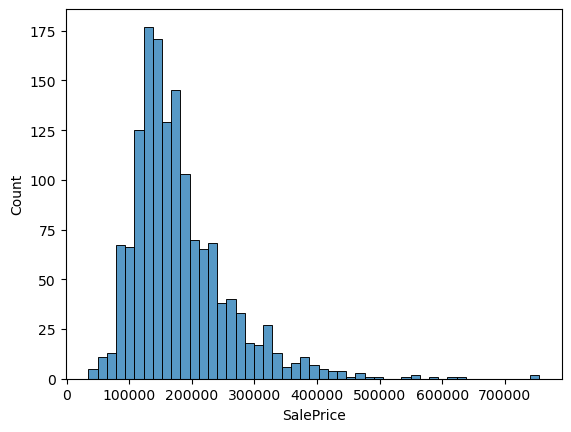

In [5]:
# distribution of values in target feature
sns.histplot(train['SalePrice'], kde=False)
plt.show()

타이타닉처럼 변수의 개수가 적을 때에는 하나씩 그래프를 그리며  
결과값과 변수 간의 관계를 파악할 수 있겠지만  
집값처럼 변수의 개수가 많을 때에는 그게 힘들다.  
즉, correlation 파악으로 변수 간의 관계를 파악해야 한다.  

이때, 모든 변수를 사용하기보다 의미 있는 변수만 골라내는 것이 더욱 효과적이다.  
corr()함수를 통해 dataframe내의 모든 변수간의 상관관계를 그린 후  
상관관계가 0.3이상인 변수만 heatmap으로 출력할 것이다.

## Feature Selection

In [9]:
# Variables of correlation >= 0.3
train_corr = train.corr(numeric_only=True)

In [12]:
selected_train_corr = train_corr.index[abs(train_corr['SalePrice'])>=0.3]
selected_train_corr

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

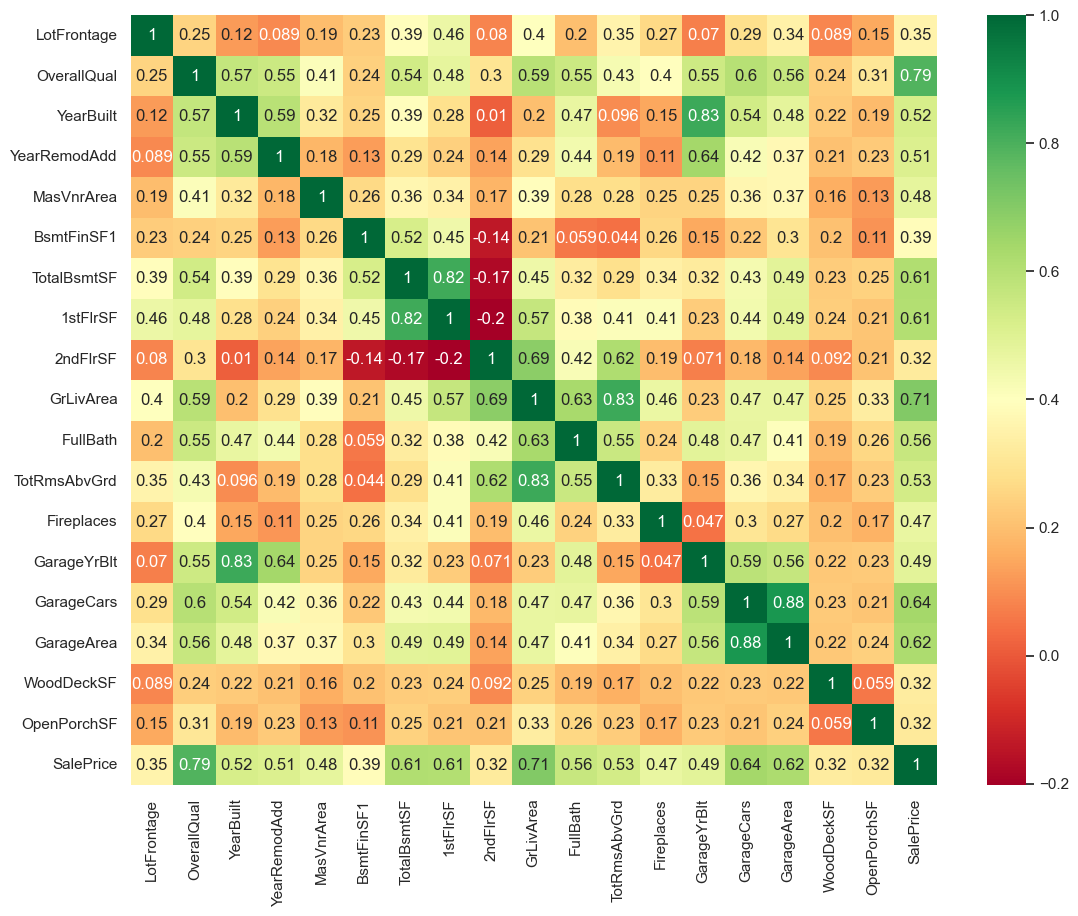

In [13]:
# heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(train[selected_train_corr].corr(numeric_only=True),annot=True,cmap="RdYlGn")

In [14]:
# split y_label
y_train = train['SalePrice']
train.drop(['SalePrice'], axis=1, inplace=True)

## Concat datasets
train과 test 셋에 동일한 feature engineering을 적용해주기 위한  
데이터셋 병합 작업

In [15]:
# concat train & test
boston_df = pd.concat((train, test), axis=0)
boston_df_index = boston_df.index

print('Length of Boston Dataset : ',len(boston_df))
boston_df.head()

Length of Boston Dataset :  2919


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Handle Missing values
각 칼럼별로 Null값 비율이 50%이상인 칼럼을 찾아 해당 칼럼을 제거  
보통 null값 처리를 위해 평균, 최대값, 최소값 등으로 대체하곤 하는데  
대부분의 칼럼이 Null인 데이터는 차라리 없애주는 것이 좋다.

In [24]:
# Null 비율 50% 이상 column 확인
null_check = boston_df.isna().sum() / len(boston_df)
null_check[null_check >= 0.5]

Alley          0.932169
MasVnrType     0.605002
PoolQC         0.996574
Fence          0.804385
MiscFeature    0.964029
dtype: float64

In [26]:
cols_remove = null_check[null_check >= 0.5].keys()
boston_df = boston_df.drop(cols_remove, axis=1)
boston_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


## Handle Data type (One-hot encoding)
Not only numeric but also categorical data.  
범주형 데이터는 각 칼럼을 0과 1로 변환해주는 one-hot encoding 적용해주어  
수치형 데이터와 가중치를 달리해주어야 한다.  
수치형 데이터와 범주형 데이터를 구분하기 위해서는 select_dtypes()를 이용.  
parameter 값으로 include와 exclude를 적용할 수 있는데 이를 통해 데이터를 분리한다.  

In [29]:
boston_obj_df = boston_df.select_dtypes(include='object')
boston_num_df = boston_df.select_dtypes(exclude='object')

In [30]:
boston_num_df.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,460.0,298,0,0,0,0,0,0,5,2007


In [31]:
boston_obj_df.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
